In [1]:
import osmnx as ox
import networkx as nx
import pandas as pd
import numpy as np
import os
import main
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning) 
warnings.simplefilter(action='ignore',category=RuntimeWarning) 
warnings.simplefilter(action='ignore',category=DeprecationWarning)

In [2]:
def download_nwk(lat=38.435220,lon=141.303816,radius=1000,show=True, save=True, foldername='Input'):
    G = ox.graph_from_point(center_point=(lat,lon), network_type='all', dist=radius, simplify=True)
    fig, ax = ox.plot_graph(G,node_color='blue',bgcolor='white', show=show)
    G_proj = ox.project_graph(G)
    return G_proj



In [3]:
areas = {
    'ishinomaki': (38.435220,141.303816),
    'otaru' : (43.197519, 140.993391),
    'kochi' : (33.50505, 133.53161),
    'noto' : (37.39048, 136.90287),
    'sumatra' : (5.55326, 95.29700),
    'peru' : (-12.07860, -77.08124)
}

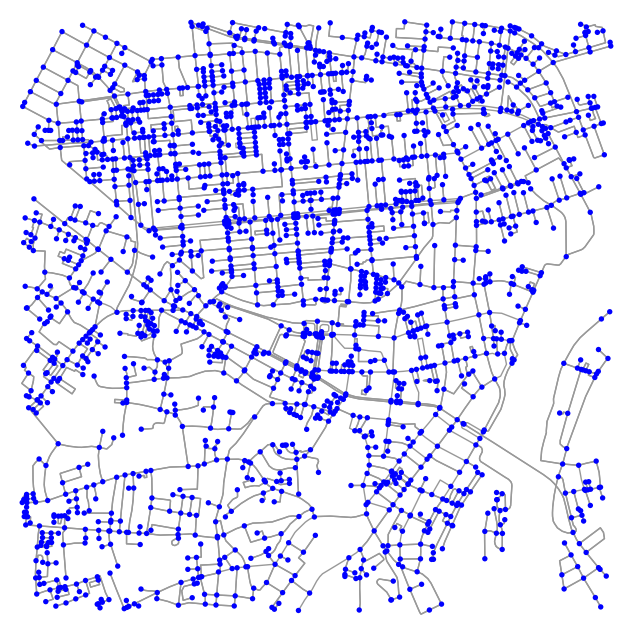

In [4]:
case = 'ishinomaki' #use names in 'areas' dictionary
#download network
G = download_nwk(areas[case][0],areas[case][1],1000,show=False, save=True, foldername=case)
#set seed for replication
np.random.seed(10)
#choose randomnly 4 nodes for evacuation

In [5]:
G #This is a projected graph MultiDiGraph

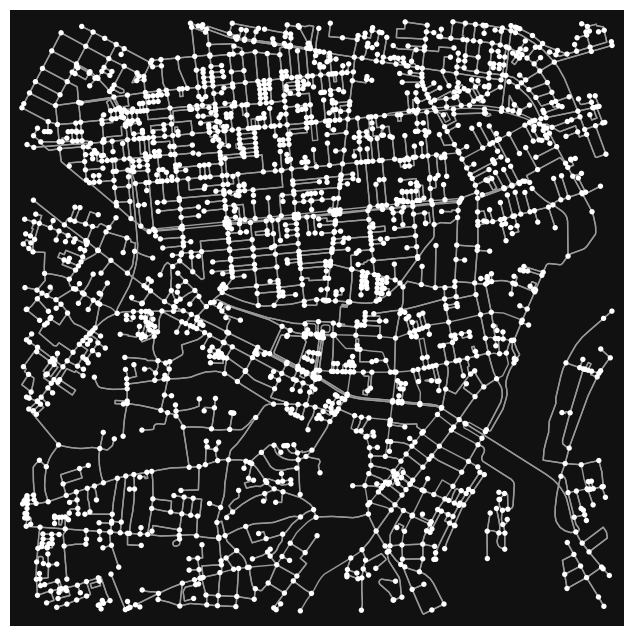

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
ox.plot_graph(G) # a MutiDiGraph can be plotted with ox.plot_graph

In [7]:
#make a Graph from the MultiDiGraph to be able to calculate other indeces
Gnew = nx.Graph(G)

In [8]:
Gnew #this is a Graph

TypeError: OutEdgeView.__call__() got an unexpected keyword argument 'keys'

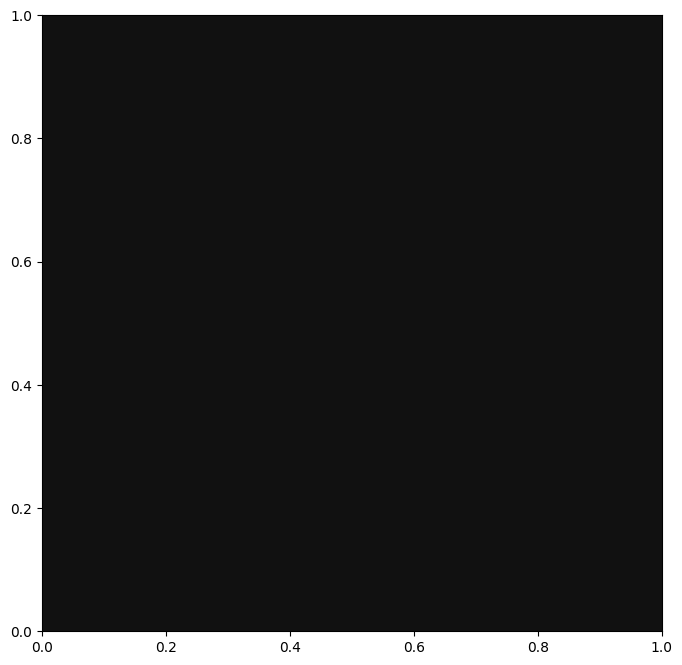

In [9]:
ox.plot_graph(Gnew) #a Graph canNOT be plotted with ox.plot_graph because is not a MultiDiGraph

In [10]:
#ISSUE 1: Is G == Gnew? 
G == Gnew

False

In [14]:
Gnew.is_multigraph(), G.is_multigraph()

(False, True)

In [29]:
Gnew_nodes = pd.DataFrame(Gnew.nodes(data=True))

In [34]:
Gnew_nodes.head()

,0,1,y
0,461190492,"{'y': 4254096.328888247, 'x': 526533.110853312...",4.254096e+06
1,918333243,"{'y': 4254088.457631121, 'x': 526531.880015187...",4.254088e+06
2,461190495,"{'y': 4253944.728143291, 'x': 526508.142762510...",4.253945e+06
3,2166919145,"{'y': 4253948.112982299, 'x': 526501.559476008...",4.253948e+06
4,2166919097,"{'y': 4253938.474846171, 'x': 526519.745348098...",4.253938e+06


In [33]:
Gnew_nodes['y']=Gnew_nodes[1].apply(lambda x: x['y']).astype(float)
Gnew_nodes['x']=Gnew_nodes[1].apply(lambda x: x['x']).astype(float)
Gnew_nodes['osmid']=Gnew_nodes[1].apply(lambda x: x['osmid']).astype(int)
Gnew_nodes.drop(1,axis=1,inplace=True)

In [ ]:
Gnew_nodes.